In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/ML/data_utils.py /content
!cp /content/drive/MyDrive/ML/download.py /content

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import data_utils
import download
from tqdm import tqdm

def download_data():
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    download_dir = "./data"
    tqdm(download.maybe_download_and_extract(url,download_dir), desc='CIFAR10 Downloading')

In [3]:
  # Class to initialize and apply K-nearest neighbour classfier
  class KNearestNeighbor(object):
      def __init__(self):
          pass

    # Method to initialize classifier with training data
    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    # Method to predict labels of test examples using 'compute_distances' and 'predict_labels' methods.
    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)

    # Method to compute Euclidean distances from each text example to every training example
    # Compute Euclidean (L2) distances
    def compute_distances(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                # Euclidean distance
                dists[i, j] = np.sqrt(np.sum((X_test[i, :] - self.X_train[j, :]) ** 2))
        return dists

    # Method to predict labels of test examples using chosen value of k given Euclidean distances obtained from 'compute_distances' method.
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # Get the indices of the k nearest neighbors
            closest_y_indices = np.argsort(dists[i])[:k]
            closest_y = self.y_train[closest_y_indices]

            # Predict the label of each test point: select the most common label
            y_pred[i] = np.argmax(np.bincount(closest_y))
        return y_pred

  def visualize_data(X_train, y_train):
      classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
      num_classes = len(classes)
      samples_per_class = 7
      for y, cls in enumerate(classes):
          idxs = np.flatnonzero(y_train == y)
          idxs = np.random.choice(idxs, samples_per_class, replace=False)
          for i, idx in enumerate(idxs):
              plt_idx = i * num_classes + y + 1
              plt.subplot(samples_per_class, num_classes, plt_idx)
              plt.imshow(X_train[idx].astype('uint8'))
              plt.axis('off')
              if i == 0:
                  plt.title(cls)
      plt.show()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


CIFAR10 Downloading: 0it [00:00, ?it/s]


Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
(10000, 3072) (1000, 3072)
Got 296 / 1000 correct with k=5 => accuracy: 0.296000


k choices: 100%|██████████| 10/10 [3:10:20<00:00, 1142.06s/it]


k = 1, accuracy = 0.288500
k = 1, accuracy = 0.284000
k = 1, accuracy = 0.282500
k = 1, accuracy = 0.274500
k = 1, accuracy = 0.277000
k = 3, accuracy = 0.287500
k = 3, accuracy = 0.274000
k = 3, accuracy = 0.278500
k = 3, accuracy = 0.267500
k = 3, accuracy = 0.265500
k = 5, accuracy = 0.294500
k = 5, accuracy = 0.284000
k = 5, accuracy = 0.297500
k = 5, accuracy = 0.275000
k = 5, accuracy = 0.278500
k = 8, accuracy = 0.298500
k = 8, accuracy = 0.296000
k = 8, accuracy = 0.284000
k = 8, accuracy = 0.274000
k = 8, accuracy = 0.286000
k = 10, accuracy = 0.302500
k = 10, accuracy = 0.287000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.266000
k = 10, accuracy = 0.285000
k = 12, accuracy = 0.304500
k = 12, accuracy = 0.293500
k = 12, accuracy = 0.285500
k = 12, accuracy = 0.265000
k = 12, accuracy = 0.275500
k = 15, accuracy = 0.294000
k = 15, accuracy = 0.297000
k = 15, accuracy = 0.275000
k = 15, accuracy = 0.274000
k = 15, accuracy = 0.276000
k = 20, accuracy = 0.294500
k = 20, accu

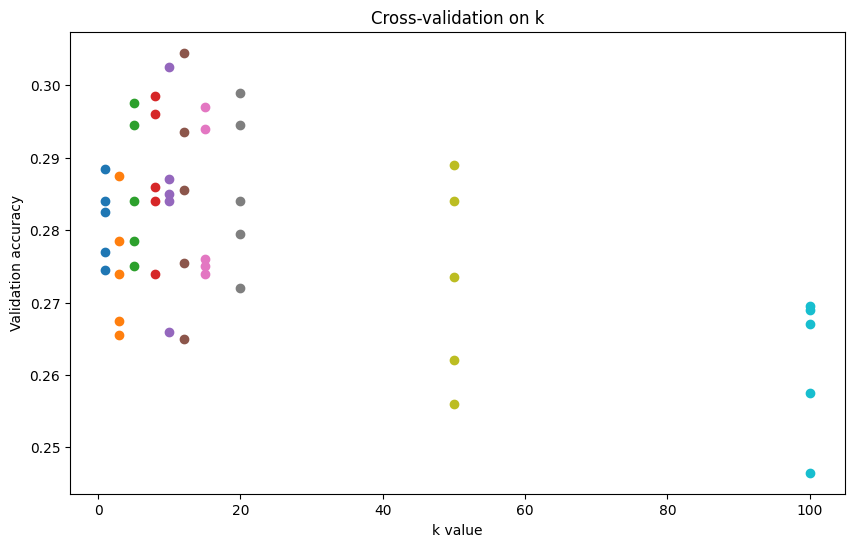

In [4]:
    if __name__ == "__main__":

    # Downloading CIFAR10 data
    download_data()
    cifar10_dir = r'./data/cifar-10-batches-py'

    # Load training and testing data from CIFAR10 dataset
    X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

    # Checking the size of the training and testing data
    print('Training data shape: ', X_train.shape)
    print('Training labels shape: ', y_train.shape)
    print('Test data shape: ', X_test.shape)
    print('Test labels shape: ', y_test.shape)

    # Memory error prevention by subsampling data. We sample 10000 training examples and 1000 test examples.
    num_training = 10000
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]

    num_test = 1000
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Reshape data and place into rows. Flatten the training and test data so each row
    # consists of all pixels of an example
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    print(X_train.shape, X_test.shape)  # X_train should be (10000, 3072) and X_test should be (1000, 3072)


    # Initializing the classifier with training data
    classifier = KNearestNeighbor()
    classifier.train(X_train, y_train)  # Assuming X_train and y_train are defined earlier

    # Computing distances from test examples to training examples
    dists = classifier.compute_distances(X_test)  # Assuming X_test is defined earlier

    # Predicting labels for each test example in X_test using k=5
    y_test_pred = classifier.predict_labels(dists, k=5)

    # Compute and print out the accuracy
    num_correct = np.sum(y_test_pred == y_test)  # Assuming y_test is defined earlier
    num_test = y_test.shape[0]  # Assuming y_test is an array of test labels
    accuracy = float(num_correct) / num_test
    print('Got %d / %d correct with k=5 => accuracy: %f' % (num_correct, num_test, accuracy))

    # Prepare for 5-fold cross-validation
    num_folds = 5
    k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

    # Splitting the training data into 5 folds
    X_train_folds = np.array_split(X_train, num_folds)
    y_train_folds = np.array_split(y_train, num_folds)

    # Dictionary to hold validation accuracies for different values of k
    k_to_accuracies = {}

    for k in tqdm(k_choices, desc='k choices'):
        k_to_accuracies[k] = []
        for fold in tqdm(range(num_folds)):
            # Use 'fold' as the validation set and the other folds as the training set
            X_train_cv = np.concatenate([X_train_folds[i] for i in range(num_folds) if i != fold])
            y_train_cv = np.concatenate([y_train_folds[i] for i in range(num_folds) if i != fold])
            X_valid_cv = X_train_folds[fold]
            y_valid_cv = y_train_folds[fold]

            # Train the classifier using the training folds
            classifier.train(X_train_cv, y_train_cv)

            # Compute distances and predict labels for the validation fold
            dists_cv = classifier.compute_distances(X_valid_cv)
            y_valid_pred = classifier.predict_labels(dists_cv, k)

            # Compute and store the accuracy for this fold
            num_correct_cv = np.sum(y_valid_pred == y_valid_cv)
            accuracy_cv = float(num_correct_cv) / len(y_valid_cv)
            k_to_accuracies[k].append(accuracy_cv)

    # Print out the computed accuracies for each value of k
    for k in sorted(k_to_accuracies):
        for accuracy in k_to_accuracies[k]:
            print('k = %d, accuracy = %f' % (k, accuracy))


    for k in k_choices:
        k_to_accuracies[k] = []  # each key, k, should hold its list of 5 validation accuracies

        # For each fold of cross validation
        for num_knn in range(num_folds):
            # 1) Split training data into validation fold and training folds
            X_train_folds_temp = X_train_folds[:]
            X_valid = X_train_folds_temp.pop(num_knn)
            X_train_temp = np.concatenate(X_train_folds_temp)

            y_train_folds_temp = y_train_folds[:]
            y_valid = y_train_folds_temp.pop(num_knn)
            y_train_temp = np.concatenate(y_train_folds_temp)

            # 2) Initialize classifier with training folds
            classifier.train(X_train_temp, y_train_temp)

            # Compute distances between examples in validation fold and training folds
            dists = classifier.compute_distances(X_valid)

            # 3) Use classifier to predict labels of validation fold for given k value
            y_test_pred = classifier.predict_labels(dists, k=k)

            # Compute accuracy
            num_correct = np.sum(y_test_pred == y_valid)
            num_test = y_valid.shape[0]  # Number of examples in the validation fold
            accuracy = float(num_correct) / num_test
            k_to_accuracies[k].append(accuracy)

    print("Printing our 5-fold accuracies for varying values of k:")
    print()
    for k in sorted(k_to_accuracies):
        for accuracy in k_to_accuracies[k]:
            print('k = %d, accuracy = %f' % (k, accuracy))

    # Print average accuracy for each k
    for k in sorted(k_to_accuracies):
        print('k = %d, avg. accuracy = %f' % (k, sum(k_to_accuracies[k])/num_folds))

    # Visualizing the accuracies for different k values
    plt.figure(figsize=(10, 6))
    for k in k_choices:
        accuracies = k_to_accuracies[k]
        plt.scatter([k] * len(accuracies), accuracies)

    plt.title('Cross-validation on k')
    plt.xlabel('k value')
    plt.ylabel('Validation accuracy')
    plt.plot()

    # After populating k_to_accuracies with accuracies from cross-validation
    accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
    # Error bars
    accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])

    # Identifying the best k value based on cross-validation results
    best_k = k_choices[np.argmax(accuracies_mean)]
    print("Best k value:", best_k)

    # Initialize the classifier with the entire training data
    classifier.train(X_train, y_train)

    # Compute distances between test examples and all training examples
    dists = classifier.compute_distances(X_test)

    # Predict labels for test data using the best k
    y_test_pred = classifier.predict_labels(dists, k=best_k)

    # Compute and display the accuracy for the best k on test data
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('Got %d / %d correct on test data => accuracy: %f' % (num_correct, num_test, accuracy))